
# <span style="color:rgb(213,80,0)">Hawkins data: BIC monitoring.</span>

This file creates Figure A.13

## Beginning of code

In [1]:
load('hawkins.txt');
y=hawkins(:,9);
X=hawkins(:,1:8);
n=length(y);
p=size(X,2)+1;
logn=log(n);
prin=0;
Xwithintercept=[ones(n,1) X];

## Prepare input for Figure A.13

Monitoring LXS Find LMS and LTS residuals


In [2]:
bdp=0.5:-0.01:0.01;
lbdp=length(bdp);
BIClxs=[bdp' zeros(lbdp,1)];
RES=zeros(n,length(bdp));

for j=1:length(bdp)
    [out]=LXS(y,X,'lms',2,'bdp',bdp(j),'nsamp',100000);

    hh=out.h;
    if hh<n
        resj=(y-Xwithintercept*out.beta).*(out.weights);
        RES(:,j)=out.residuals;
        % Apply Tallis consistency factor
        vt = norminv(0.5*(1+hh/n));
        factor = 1/(1-2*(n/hh)*vt.*normpdf(vt));
        RSS=factor*resj'*(resj); % /hh;
        BIClxs(j,2)=-n*log(RSS/hh)-logn*(p+n-hh);
    else
        beta=Xwithintercept\y;
        res=y-Xwithintercept*beta;
        RSS=res'*res;
        BIClxs(j,2)=-n*log(RSS/hh)-logn*p;
    end

end

Total estimated time to complete FASTLTS:  0.71 seconds 
Total estimated time to complete FASTLTS:  0.69 seconds 
Total estimated time to complete FASTLTS:  0.59 seconds 
Total estimated time to complete FASTLTS:  0.57 seconds 
Total estimated time to complete FASTLTS:  0.56 seconds 
Total estimated time to complete FASTLTS:  0.66 seconds 
Total estimated time to complete FASTLTS:  0.57 seconds 
Total estimated time to complete FASTLTS:  0.58 seconds 
Total estimated time to complete FASTLTS:  0.57 seconds 
Total estimated time to complete FASTLTS:  0.58 seconds 
Total estimated time to complete FASTLTS:  0.62 seconds 
Total estimated time to complete FASTLTS:  0.59 seconds 
Total estimated time to complete FASTLTS:  0.63 seconds 
Total estimated time to complete FASTLTS:  0.54 seconds 
Total estimated time to complete FASTLTS:  0.63 seconds 
Total estimated time to complete FASTLTS:  0.60 seconds 
Total estimated time to complete FASTLTS:  0.58 seconds 
Total estimated time to complet

## Create Figure 4.43

LTS figure


In [3]:
subplot(2,2,1)
plot(BIClxs(:,1),BIClxs(:,2))
xlabel('Breakdown point')
ylabel('BIC')
[~,indmax]=max(BIClxs(:,2));
ylim([min(BIClxs(:,2)) max(BIClxs(:,2))])
xlim([0 0.5])

set(gca,'XDir','rev')

% FS
outpre=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.06 seconds


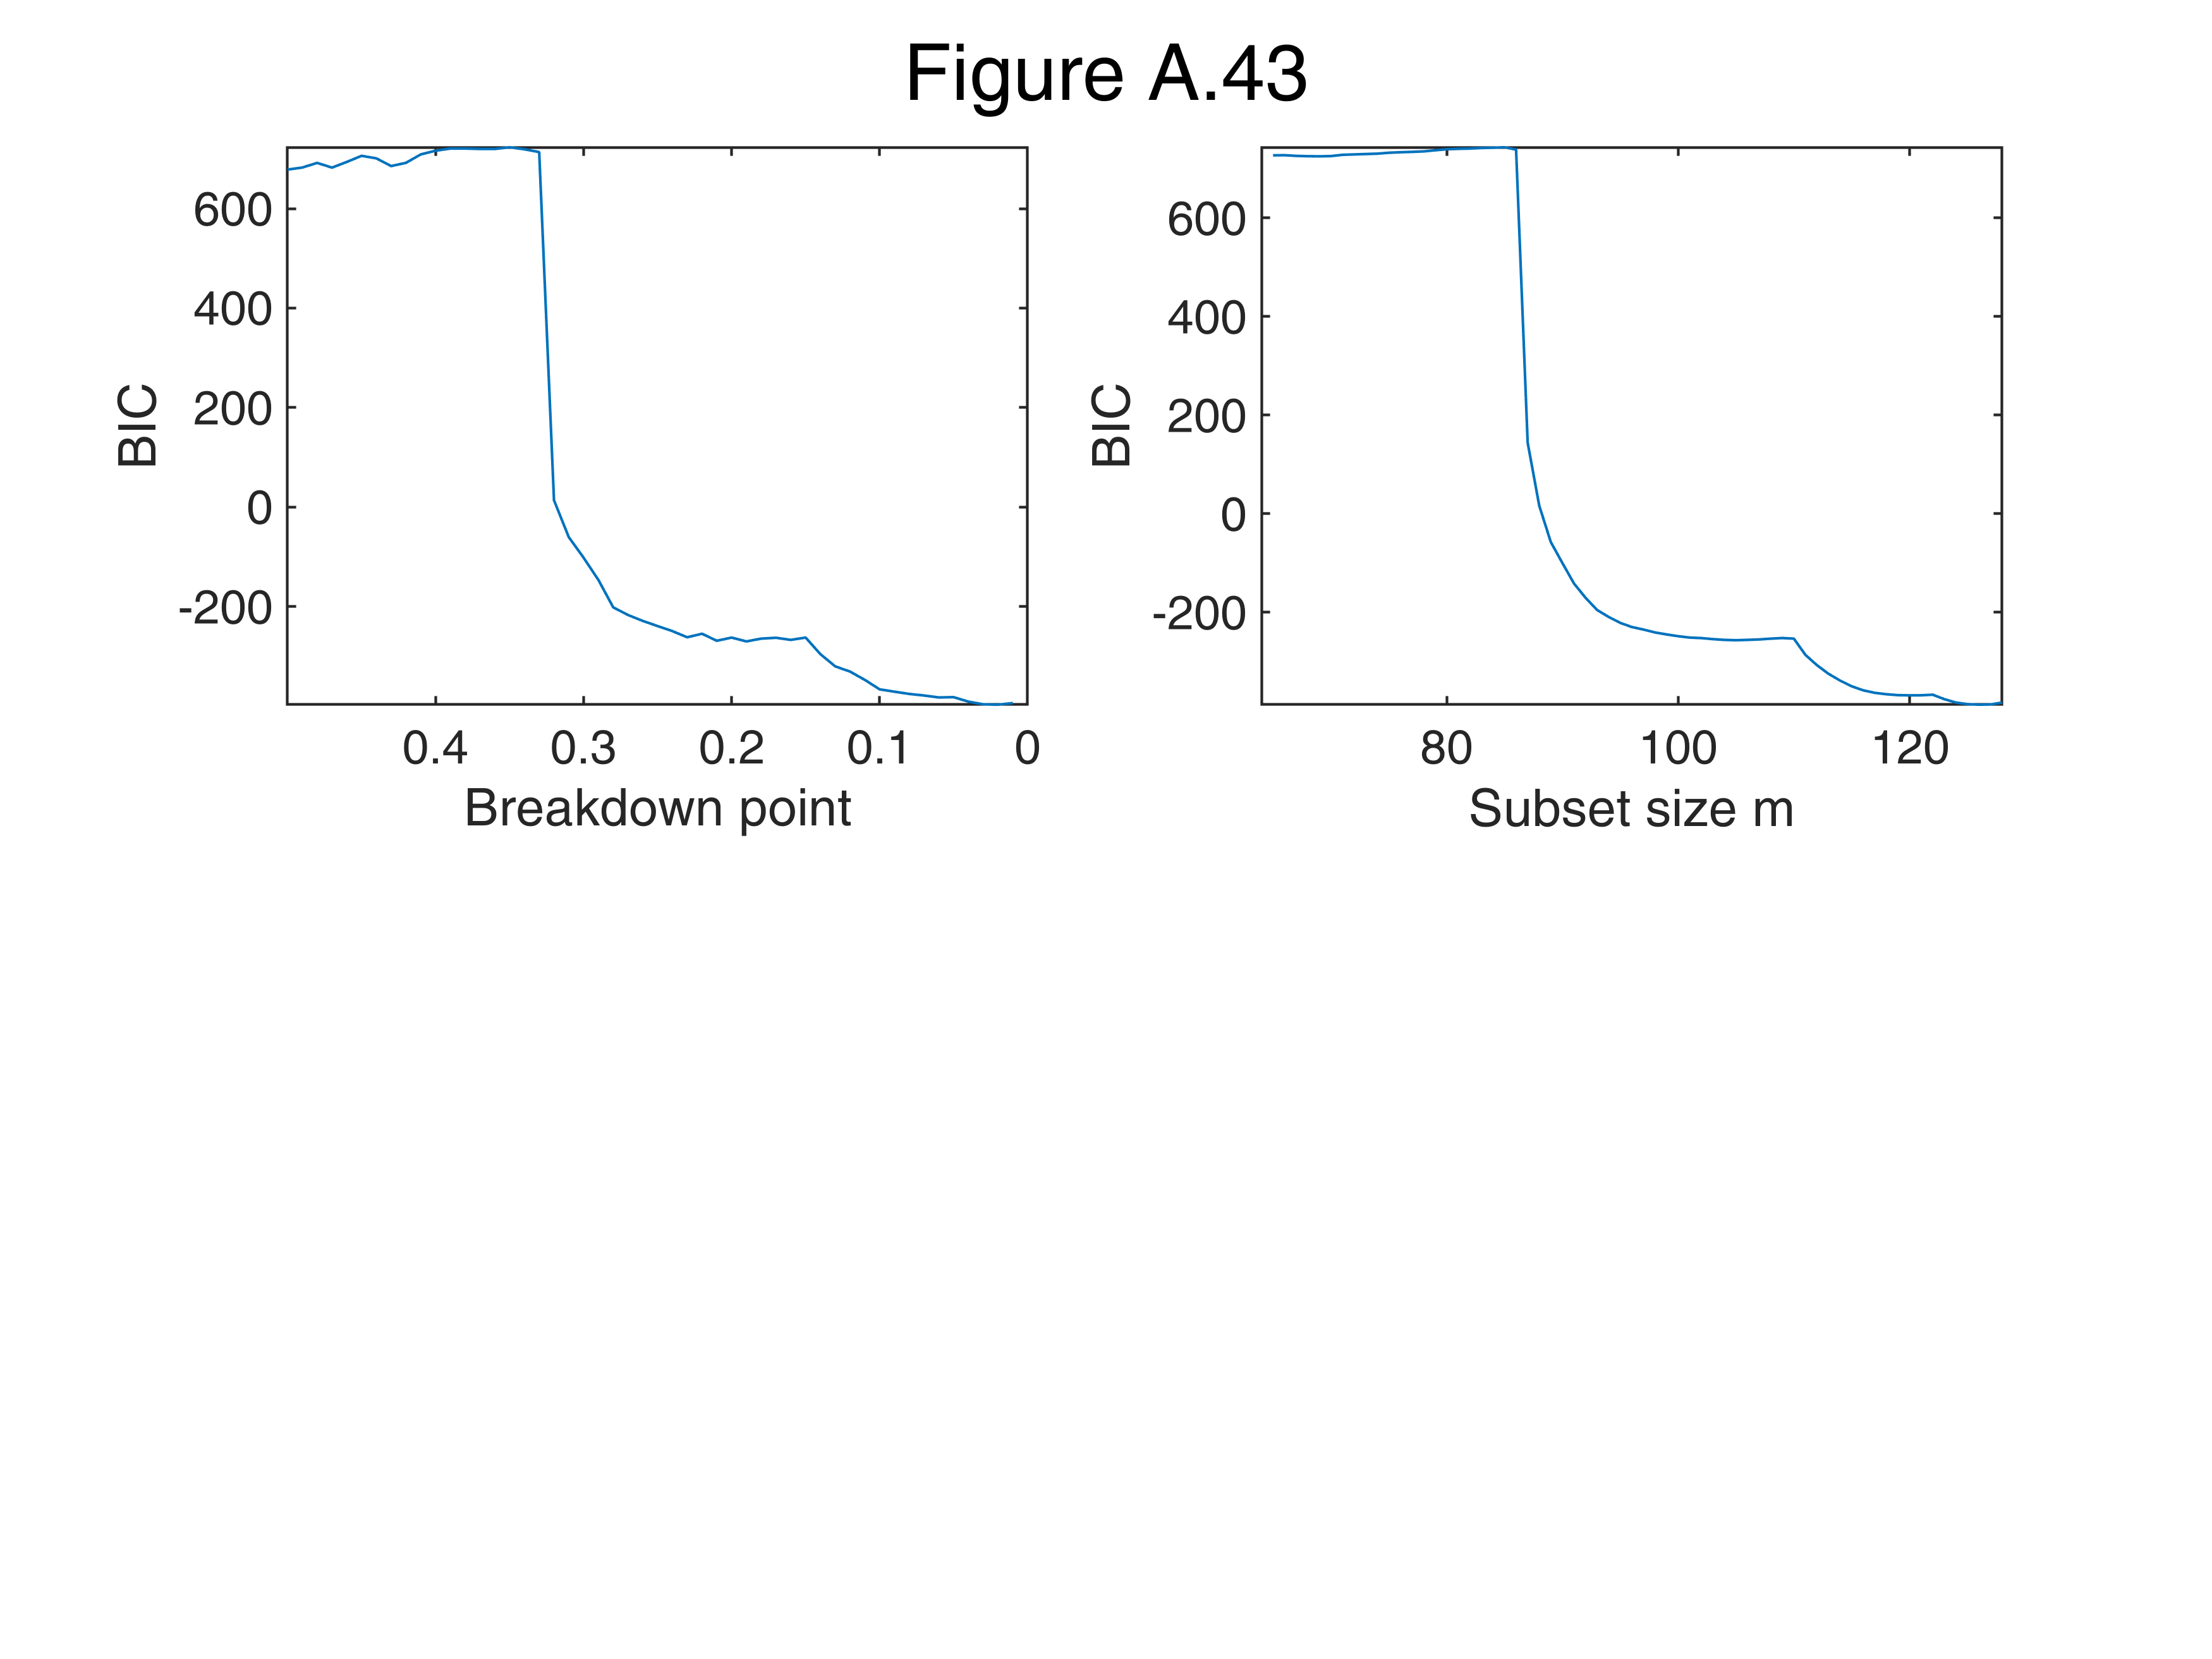

In [4]:
[Un,BB]=FSRbsb(y,X,outpre.bs,'init',round(n/2));
BICfs=[Un(:,1), zeros(size(Un,1),1)];
for j=2:size(BB,2)
    boo=~isnan(BB(:,j));
    hh=sum(boo);
    Xb=Xwithintercept(boo,:);
    yb=y(boo);
    beta=Xb\yb;
    resj=yb-Xb*beta;
    if hh<n
        % Apply Tallis consistency factor
        vt = norminv(0.5*(1+hh/n));
        factor = 1/(1-2*(n/hh)*vt.*normpdf(vt));
        RSS=factor*resj'*(resj);
    else
        RSS=resj'*resj;
    end
    BICfs(j-1,2)=-n*log(RSS/hh)-logn*(p+n-hh);
end

% Plot BIC FOR FS
subplot(2,2,2)
plot(BICfs(:,1),BICfs(:,2))
xlabel('Subset size m')
ylabel('BIC')
[~,indmax]=max(BICfs(:,2));
ax=axis;

xlim([n/2 n])
ylim([min(BICfs(:,2)) max(BICfs(:,2))])

if prin==1
    % print to postscript
    print -depsc Hbic.eps;
else
    sgtitle('Figure A.43')
    set(gcf,"Name",'Figure A.13')
end

In [5]:

%InsideREADME